# The policy based on limited data


&emsp;Now let's suppose we got the limited amount of data about the users' behavior beforehand. More precisely someone held field experiments with limited amount of users, and recorded the number of "leave"s and "next"s for each page. We don't know what was the policy and how exactly the data was collected.<br>
&emsp;If we return to the MDP terms we say that we have a data regarding the transitions in the process, but the exact transition probabilities are uncertain. According to the current problem definition, the transition function depends only on the page shown, and not on the pages previously viewed. That's why the information about "leave"s and "next"s for each page is sufficient to estimate the transition probabilities <br>
&emsp;The question is: how we define a policy based on this information. The goal is not to continue learning the users' preferences, but to define the best policy based on the data we have. Let's say the game is over after exactly one user, and we need to maximize the (expected) reward.<br>
&emsp;The term the best policy is somehow vague for uncertain data. In face of uncertainty the "best" policy that we compute may turn to be bad in the reality. There are more than one possible ways to define the policy that we are looking for.<br>
&emsp;In the literature that deals with this type of MDP ( Uncertain MDP or more precisely the MDP with uncertain transition probabilities ) mainly the robust solutions are proposed. That is the researchers constructing solutions that will guarantee the best results in the worst cases (maximin reward , minimax regrets and other related measurements). The analysis of the MDPs varies according to the types of uncertainty that are imposed on the transition probabilities. <br> <br> 


### The policy that is based on posterior samples

&emsp;The structure of our MDP allows us to look for more simple and strong solutions. The sufficient quantity to estimate the transition function is "leaving" probability. Before we move to other approaches that were mentioned in the literature, we will try a simple Bayessian approach inspired by Thompson sampling.<br>

#### The algorithm sketch

&emsp;*Given an uniform prior on leaving probabilities we will construct the posteriors based on data. Then, when we show the content to the single control user, we will sample the leaving probabilities from all posteriors, and choose the page with the smallest sampled "leaving" probability, that the visitor didn't yet seen.*<br>
&emsp;The result will be compared to the actual best policy constructed using real user's preferences and to the random policy.<br><br>
### Remark:
##### &emsp;All the policies we produce here show each page at most once !



#### Including  Simple_MDP definitions 

In [2]:
include("Simple_MDP_includes/Simple_MDP_Definition.jl")

In [3]:
#
try
    using Pkg
    using StatsPlots
    using Plots

catch  LoadError
    Pkg.add("StatsPlots")
    Pkg.add("Plots")

    using StatsPlots
    using Plots


end;

### POMDPs.jl interface's policy generation scheme 

POMDPs package describes the interface for custom policy generation. Four parts should be implemented: a <span style='background:#D3D3D3'> Solver </span> and a <span style='background:#D3D3D3'> Policy </span> - the subclasses of the corresponding classes from POMDPs. And two function POMDPs.solve and POMDPs.action.<br><br>

<span style='background:#D3D3D3'> POMDPs.solve </span> - receives the Solver and the MDP and returns the object of type Policy.<br>
<span style='background:#D3D3D3'> POMDPs.action </span> - receives the Policy and the State and returns an action.

### Implementing the policy
In order to create the policy, we will mimic the entire process of collecting the statistics for the pages. And than constructing the sample based policy from it. Thus on the first stage we run a simulation to produce data and than build a policy based on it.<br>
### Example of policy production and usage
<hr style="border:0.5px solid gray"> </hr>
1. Before receiving the data we have a uniform Dirichlet prior on the transitions.<br>Example for action "show page 1":
    <table style="border-collapse:collapse;border-spacing:0" class="tg"><thead><tr><th style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:bold;text-decoration:underline">Action:</span><br><span style="font-weight:bold;text-decoration:underline">show page</span><br><span style="font-weight:bold">1</span></th><th style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:20px;font-weight:normal;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal" colspan="3"><span style="font-weight:bold">Next state: </span><br><span style="font-weight:bold">s'</span></th></tr></thead><tbody><tr><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:20px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal" rowspan="3"><br><span style="font-weight:bold">Current</span><br><span style="font-weight:bold">state:</span><br><span style="font-weight:bold">s</span><br></td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal"></td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">s_next</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">s_leaved</td></tr><tr><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">s_next</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">1 - P_1</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">P_1</td></tr><tr><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">s_leaved</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">0</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">1</td></tr></tbody></table>
    
### When <h1 style="border:1px solid Tomato;">$[P_1,1-P_1] \sim Dir([1 ,1])$</h1>
<br><br>
<hr style="border:0.5px solid gray"> </hr>
2. Then we receive a data about each page ( or in our case we produce it at presimulation stage ). The data looks like this: <br><br>
<table style="border-collapse:collapse;border-spacing:0" class="tg"><thead><tr><th style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:bold">Pages'</span><br><span style="font-weight:bold">statistics</span></th><th style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">"Next"s</th><th style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">"Leave"s</th></tr></thead><tbody><tr><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">Page 1</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">0</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">5</td></tr><tr><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">Page 2</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">2</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">4</td></tr><tr><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">Page 3</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">3</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">4</td></tr><tr><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal" colspan="3">..........</td></tr></tbody></table>
<br><br>
<hr style="border:0.5px solid gray"> </hr>
3. The priors of each pages are updated according to the data and then the DirichletPolicy is produced:
<br><br>
    <table style="border-collapse:collapse;border-spacing:0" class="tg"><thead><tr><th style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:bold;text-decoration:underline">Action:</span><br><span style="font-weight:bold;text-decoration:underline">show page</span><br><span style="font-weight:bold">1</span></th><th style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:20px;font-weight:normal;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal" colspan="3"><span style="font-weight:bold">Next state: </span><br><span style="font-weight:bold">s'</span></th></tr></thead><tbody><tr><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:20px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal" rowspan="3"><br><span style="font-weight:bold">Current</span><br><span style="font-weight:bold">state:</span><br><span style="font-weight:bold">s</span><br></td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal"></td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">s_next</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">s_leaved</td></tr><tr><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">s_next</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">1 - P_1</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">P_1</td></tr><tr><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">s_leaved</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">0</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">1</td></tr></tbody></table>
    
<br><br> 
### When <h1 style="border:1px solid Tomato;">$[P_1,1-P_1] \sim Dir([1 + \text{number of "next"s},1 + \text{number of "leave"s}])$</h1>
<br><br>
<hr style="border:0.5px solid gray"> </hr>
4. Thus the policy will contain at the end the following table:
<br><br>
<table style="border-collapse:collapse;border-spacing:0" class="tg"><thead><tr><th style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:bold">Pages</span></th><th style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:bold">Posterior</span><br><span style="font-weight:bold">Distributions</span></th></tr></thead><tbody><tr><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">Page 1</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Dir([1,6])</td></tr><tr><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">Page 2</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Dir([3,5])</td></tr><tr><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">Page 3</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Dir([4,5])</td></tr><tr><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal" colspan="2">..........</td></tr></tbody></table>
<br><br>
5. Before showing the page, the posteriors of the pages *that weren't presented to the current user* will be sampled. Then the page with the smallest leaving probability ( according to the samples ) will be chosen to be shown. If the user saw all the pages, the agent performs action $a_stop$ - stop showing the pages.
<br><br>

#####  Creating the Solver and the Policy objects
1. The Solver: <br> We call it a <span style='background:#D3D3D3'> DirichletSolver </span>. DirichletSolver structure contains three attributes : Simulator, Policy objects and num_of_rounds. They are used to simulate data generation that will be used for <span style='background:#D3D3D3'> DirichletPolicy </span> production.<br>This work is executed in  <span style='background:#D3D3D3'> POMDPs.solve </span> function. The process is as following: we create a new MDP instance and use the *policy* to run it on the *simulator*. Then the statistics we get from the simulation is used as data on the next stages.<br> The variable num_of_rounds denotes the number of rounds we perform to create the data , or in MANP terms - the number of users which was used to collect the data. Pay attention that it has nothing common with the policy that we should find . The only purpose here is to simulate the process of data collection.    
2. The Policy:<br> We call it <span style='background:#D3D3D3'> DirichletPolicy </span>, it contains the dictionary of actions ( show page $x$ action) and the corresponding Dirichlet distribution. Dirichlet distr. is the posterior for the probability of "leaving"/"pressing next" for each page. <br> In addition <span style='background:#D3D3D3'> DirichletPolicy </span> has *pages_shown* attribute, which contains the pages that were shown until the current round ( In order to show each page no more than once ). This field should be cleaned before each round.

In [4]:
struct DirichletSolver <: Solver
    num_of_rounds :: Int64
    simulator :: Simulator
    policy :: Policy
end

mutable struct DirichletPolicy <: Policy
    pages_shown :: Array{Page,1}
    action_distribution_vector ::  Dict{Action_simple,Distribution}
end

##### Creating POMDPs.solve and POMDPs.action functions 
<span style='background:#D3D3D3'> POMDPs.solve </span> function runs a simulation to produce the data and then it constructs a posterior from the received data for each page. The prior is uniform $Dirichlet([1,1])$ for all pages, and the posterior is simply $Dirichlet([1+\text{num of "next"s}, 1+\text{num of "leave"s}])$.

In [5]:
function POMDPs.solve(solver:: DirichletSolver, mdp :: ContentProducerMdp1)
    
    for i in 1:solver.num_of_rounds
       simulate(solver.simulator, mdp, solver.policy) 
    end
    
    actions = POMDPs.actions(mdp)
    
    action_distribution_vector = Dict()
    
    stat = mdp.statistics
    
    for action in actions
        if action.show_page === nothing
           continue 
        end
        page_number = action.show_page.id
        nexts = stat.nexts_per_page[page_number]
        leaves = stat.leaves_per_page[page_number]
        
        action_distribution_vector[action] = Dirichlet([nexts+1,leaves+1])
    end
    
    return DirichletPolicy([],action_distribution_vector)
    
    
end

<span style='background:#D3D3D3'> POMDPs.action</span> function just samples Dirichlet posteriors of all the pages that weren't currently visited. It returns an action ( show page $x$) with the maximal corresponding probability of pressing "next".

In [6]:
function POMDPs.action(policy::DirichletPolicy, state::State_simple )
    all_actions = keys(policy.action_distribution_vector) 
    visited_pages = Set(policy.pages_shown)
    remaining_actions = [action for action in all_actions if !(action.show_page in visited_pages)]
      
    if length(remaining_actions) == 0
        policy.pages_shown = Page[]            
        return Action_simple(nothing)
    end 
                
    best_action = findmax(map(action -> rand(policy.action_distribution_vector[action])[1], remaining_actions))
    best_action = remaining_actions[best_action[2]]  
    push!(policy.pages_shown,best_action.show_page)
                
    return best_action
                

end

##### Best and Random policy construction 

In order to test the <span style='background:#D3D3D3'> DirichletPolicy</span>, we produced the benchmark policies <span style='background:#D3D3D3'> BestPolicy</span> and  <span style='background:#D3D3D3'> RandomPolicy</span>. We implemented the same schema of POMDPs.jl. For best policy , the next page is chosen by the real "leaving" probability from  the set of pages that weren't currently visited.

In [7]:
include("Simple_MDP_includes/Best_Policy.jl");
include("Simple_MDP_includes/Random_Policy.jl");

### Experiments and results

&emsp;In this part we will perform an experiments to compare Dirichlet policy with Best policy and Random policy. All the experiments will be presented in one big chunk of code, that's why we divided it to stages. Each stage will be described here. <br>
<br> 
&emsp;The general settings of the experiments are 1) overall number of pages $p$ (the "leaving" probabilities that are defined as function of $p$) 2) the number of users $u_{data}$ which was used to collect the initial data . Pairs of these values are stored in <span style='background:#D3D3D3'> pages_data_users_nums</span> . <br>

The big outer loop will pass through all the stages for each pair in pages_data_users_nums.

##### Stage 1
Creating the pages and the user. <br>
&emsp;Let $N$ be the number of the pages. The user preferences will be produced in the following way:<br>
For each page with id $x$ the probability of leaving will be $1 - \frac{x-1}{N}$ <br>
For example, if the number of pages $N=20$ , the probability of leaving for the first page will be $1$ , for second page  $1- \frac{1}{20} = 0.95$ and for the last page $1 - \frac{19}{20} = 0.05$.<br>

##### Stage 2

&emsp;The stage of creating data (a "presimulation" ) and a DirichletPolicy based on this data.<br>
To produce the data we run *random policy* on the new Mdp instance $u_{data}$ times and examine it's statistics. <br>

&emsp;POMDPs.solve returns DirichletPolicy that is based on the data it got from the presimulation. It is done by simply updating uniform Dirichlet prior for each page according to presimulation's data. 
 
##### Stage 3
&emsp;Producing a fresh MDP and a BestSolver instance for the "best" policy - a benchmark for testing DirichletPolicy.
Creating a BestPolicy is done inside  POMDPs.solver by querying the user for the leaving probabilities for each page.<br>

&emsp;Producing the random policy RandPolicy in the same way.

##### Stage 4

&emsp;Creating a new MANP MDP object to run DirichletPolicy.<br>
&emsp;The new simulator object will be used for  BetaPolicy, BestPolicy and a Random policy.

##### Stage 5

&emsp;The actual BestPolicy, Random and BetaPolicy simulation. It is done num_of_experiments rounds. The policies history is cleaned before each simulation.


In [8]:

# Experiments settings : Number of pages and number of users for data collection
pages_data_users_nums = [(5,1000),(5,100), (5,10),(5,2),(100,100)]


# Number of iterations to test the resulting policy
num_of_experiments = 100

# data to produce statistics
for_statistics = Any[]

# The main experiments loop 
for (pages_num,data_users_num) in pages_data_users_nums
    ##########################################################################################
    ##################################### Stage 1 ############################################
    ##########################################################################################
    
    pages2 = CreatePages(pages_num)
    user2 = User_simple(2,
        userPreferencesCreate(pages2,
                                collect(1:-(1/pages_num):1/pages_num)))
    
    ##########################################################################################
    ##################################### Stage 2 ############################################
    ##########################################################################################    
    
    # Data creation MDP, Policy and Simulator
    statistics3 = InitStatistics1(length(pages2))
    mdp3 = ContentProducerMdp1(pages2,user2,statistics3,true); 

    data_coll_policy = RandomPolicy(mdp3)
    presimulator = RolloutSimulator()
    
    # Dirichlet policy creation
    solver3 = DirichletSolver(data_users_num, presimulator, data_coll_policy)
    policy3 = POMDPs.solve(solver3,mdp3);

    
    ##########################################################################################
    ##################################### Stage 3 ############################################
    ##########################################################################################
    
    # Best Policy
    statistics4 = InitStatistics1(length(pages2))
    mdp4 = ContentProducerMdp1(pages2,user2,statistics4,true); 

    solver4 = BestSolver()
    policy4 = POMDPs.solve(solver4,mdp4)
    
    # Random Policy
    statistics6 = InitStatistics1(length(pages2))
    mdp6 = ContentProducerMdp1(pages2,user2,statistics6,true); 
    
    rand_solver = RandSolver()
    random_policy = POMDPs.solve(rand_solver,mdp6)

    ##########################################################################################
    ##################################### Stage 4 ############################################
    ##########################################################################################
    
    statistics5 = InitStatistics1(length(pages2))
    mdp5 = ContentProducerMdp1(pages2,user2,statistics5,true); 
        
    simulator5 = RolloutSimulator()
   
    ##########################################################################################
    ##################################### Stage 5 ############################################
    ##########################################################################################
    
IJulia.clear_output();
    
    for i in 1:num_of_experiments
        
        println("======== Dirichlet =======")
        policy3.pages_shown = Page[]
        simulate(simulator5, mdp5, policy3)
        
        println("======== Best =========")
         policy4.pages_shown = Page[]
        simulate(simulator5, mdp4, policy4)
        
        println("======== Random =========")
        random_policy.pages_shown = Page[]
        simulate(simulator5, mdp6, random_policy)
        
        println()
    end

    
    experiment_data = (pre_rounds_num=data_users_num, pages_num=pages_num,
                        best_policy=policy4, best_mdp=mdp4,
                        Dirichlet_policy=policy3, Dirichlet_mdp=mdp5,
                        random_policy=random_policy,random_mdp=mdp6)
    
    push!(for_statistics,experiment_data)
    end;




======== Dirichlet =======
The agent showed page : Page(42)
The agent showed page : Page(63)
The agent showed page : Page(79)
The user leaved.
Summary  : 
 Pages seen: Page[Page(42), Page(63), Page(79)] 
 Number of pages seen: 3
======== Best =========
The agent showed page : Page(100)
The agent showed page : Page(99)
The agent showed page : Page(98)
The agent showed page : Page(97)
The agent showed page : Page(96)
The agent showed page : Page(95)
The agent showed page : Page(94)
The agent showed page : Page(93)
The agent showed page : Page(92)
The agent showed page : Page(91)
The user leaved.
Summary  : 
 Pages seen: Page[Page(100), Page(99), Page(98), Page(97), Page(96), Page(95), Page(94), Page(93), Page(92), Page(91)] 
 Number of pages seen: 10
======== Random =========
The agent showed page : Page(25)
The user leaved.
Summary  : 
 Pages seen: Page[Page(25)] 
 Number of pages seen: 1

======== Dirichlet =======
The agent showed page : Page(27)
The user leaved.
Summary  : 
 Pages se

The agent showed page : Page(54)
The agent showed page : Page(92)
The agent showed page : Page(97)
The agent showed page : Page(96)
The agent showed page : Page(93)
The agent showed page : Page(87)
The agent showed page : Page(42)
The user leaved.
Summary  : 
 Pages seen: Page[Page(12), Page(78), Page(85), Page(54), Page(92), Page(97), Page(96), Page(93), Page(87), Page(42)] 
 Number of pages seen: 10
======== Best =========
The agent showed page : Page(100)
The agent showed page : Page(99)
The agent showed page : Page(98)
The agent showed page : Page(97)
The agent showed page : Page(96)
The agent showed page : Page(95)
The agent showed page : Page(94)
The user leaved.
Summary  : 
 Pages seen: Page[Page(100), Page(99), Page(98), Page(97), Page(96), Page(95), Page(94)] 
 Number of pages seen: 7
======== Random =========
The agent showed page : Page(57)
The agent showed page : Page(89)
The agent showed page : Page(50)
The agent showed page : Page(21)
The user leaved.
Summary  : 
 Pages s

The agent showed page : Page(39)
The agent showed page : Page(100)
The agent showed page : Page(95)
The agent showed page : Page(54)
The agent showed page : Page(93)
The agent showed page : Page(88)
The user leaved.
Summary  : 
 Pages seen: Page[Page(98), Page(39), Page(100), Page(95), Page(54), Page(93), Page(88)] 
 Number of pages seen: 7
======== Best =========
The agent showed page : Page(100)
The agent showed page : Page(99)
The agent showed page : Page(98)
The agent showed page : Page(97)
The agent showed page : Page(96)
The agent showed page : Page(95)
The agent showed page : Page(94)
The agent showed page : Page(93)
The agent showed page : Page(92)
The agent showed page : Page(91)
The user leaved.
Summary  : 
 Pages seen: Page[Page(100), Page(99), Page(98), Page(97), Page(96), Page(95), Page(94), Page(93), Page(92), Page(91)] 
 Number of pages seen: 10
======== Random =========
The agent showed page : Page(93)
The agent showed page : Page(51)
The agent showed page : Page(4)
The

The agent showed page : Page(93)
The agent showed page : Page(92)
The agent showed page : Page(91)
The agent showed page : Page(90)
The agent showed page : Page(89)
The agent showed page : Page(88)
The agent showed page : Page(87)
The agent showed page : Page(86)
The agent showed page : Page(85)
The agent showed page : Page(84)
The agent showed page : Page(83)
The agent showed page : Page(82)
The agent showed page : Page(81)
The user leaved.
Summary  : 
 Pages seen: Page[Page(100), Page(99), Page(98), Page(97), Page(96), Page(95), Page(94), Page(93), Page(92), Page(91), Page(90), Page(89), Page(88), Page(87), Page(86), Page(85), Page(84), Page(83), Page(82), Page(81)] 
 Number of pages seen: 20
======== Random =========
The agent showed page : Page(13)
The agent showed page : Page(93)
The agent showed page : Page(91)
The agent showed page : Page(3)
The user leaved.
Summary  : 
 Pages seen: Page[Page(13), Page(93), Page(91), Page(3)] 
 Number of pages seen: 4

======== Dirichlet =======

======== Dirichlet =======
The agent showed page : Page(100)
The agent showed page : Page(63)
The user leaved.
Summary  : 
 Pages seen: Page[Page(100), Page(63)] 
 Number of pages seen: 2
======== Best =========
The agent showed page : Page(100)
The agent showed page : Page(99)
The agent showed page : Page(98)
The agent showed page : Page(97)
The agent showed page : Page(96)
The agent showed page : Page(95)
The agent showed page : Page(94)
The agent showed page : Page(93)
The agent showed page : Page(92)
The agent showed page : Page(91)
The agent showed page : Page(90)
The agent showed page : Page(89)
The agent showed page : Page(88)
The agent showed page : Page(87)
The agent showed page : Page(86)
The agent showed page : Page(85)
The agent showed page : Page(84)
The user leaved.
Summary  : 
 Pages seen: Page[Page(100), Page(99), Page(98), Page(97), Page(96), Page(95), Page(94), Page(93), Page(92), Page(91), Page(90), Page(89), Page(88), Page(87), Page(86), Page(85), Page(84)] 
 Number

The agent showed page : Page(97)
The agent showed page : Page(96)
The user leaved.
Summary  : 
 Pages seen: Page[Page(100), Page(99), Page(98), Page(97), Page(96)] 
 Number of pages seen: 5
======== Random =========
The agent showed page : Page(25)
The user leaved.
Summary  : 
 Pages seen: Page[Page(25)] 
 Number of pages seen: 1

======== Dirichlet =======
The agent showed page : Page(99)
The agent showed page : Page(96)
The agent showed page : Page(69)
The user leaved.
Summary  : 
 Pages seen: Page[Page(99), Page(96), Page(69)] 
 Number of pages seen: 3
======== Best =========
The agent showed page : Page(100)
The agent showed page : Page(99)
The agent showed page : Page(98)
The agent showed page : Page(97)
The agent showed page : Page(96)
The agent showed page : Page(95)
The agent showed page : Page(94)
The agent showed page : Page(93)
The agent showed page : Page(92)
The agent showed page : Page(91)
The agent showed page : Page(90)
The agent showed page : Page(89)
The agent showed 

The agent showed page : Page(99)
The agent showed page : Page(98)
The agent showed page : Page(97)
The agent showed page : Page(96)
The agent showed page : Page(95)
The agent showed page : Page(94)
The agent showed page : Page(93)
The agent showed page : Page(92)
The agent showed page : Page(91)
The agent showed page : Page(90)
The agent showed page : Page(89)
The agent showed page : Page(88)
The agent showed page : Page(87)
The agent showed page : Page(86)
The agent showed page : Page(85)
The user leaved.
Summary  : 
 Pages seen: Page[Page(100), Page(99), Page(98), Page(97), Page(96), Page(95), Page(94), Page(93), Page(92), Page(91), Page(90), Page(89), Page(88), Page(87), Page(86), Page(85)] 
 Number of pages seen: 16
======== Random =========
The agent showed page : Page(52)
The user leaved.
Summary  : 
 Pages seen: Page[Page(52)] 
 Number of pages seen: 1

======== Dirichlet =======
The agent showed page : Page(63)
The user leaved.
Summary  : 
 Pages seen: Page[Page(63)] 
 Number o

======== Best =========
The agent showed page : Page(100)
The agent showed page : Page(99)
The agent showed page : Page(98)
The agent showed page : Page(97)
The agent showed page : Page(96)
The agent showed page : Page(95)
The agent showed page : Page(94)
The user leaved.
Summary  : 
 Pages seen: Page[Page(100), Page(99), Page(98), Page(97), Page(96), Page(95), Page(94)] 
 Number of pages seen: 7
======== Random =========
The agent showed page : Page(21)
The user leaved.
Summary  : 
 Pages seen: Page[Page(21)] 
 Number of pages seen: 1

======== Dirichlet =======
The agent showed page : Page(40)
The user leaved.
Summary  : 
 Pages seen: Page[Page(40)] 
 Number of pages seen: 1
======== Best =========
The agent showed page : Page(100)
The agent showed page : Page(99)
The agent showed page : Page(98)
The agent showed page : Page(97)
The agent showed page : Page(96)
The agent showed page : Page(95)
The agent showed page : Page(94)
The agent showed page : Page(93)
The agent showed page : P

The user leaved.
Summary  : 
 Pages seen: Page[Page(92), Page(66), Page(95), Page(99), Page(98), Page(77), Page(93), Page(85), Page(86), Page(63), Page(70), Page(100), Page(74), Page(64)] 
 Number of pages seen: 14
======== Best =========
The agent showed page : Page(100)
The agent showed page : Page(99)
The agent showed page : Page(98)
The agent showed page : Page(97)
The agent showed page : Page(96)
The agent showed page : Page(95)
The user leaved.
Summary  : 
 Pages seen: Page[Page(100), Page(99), Page(98), Page(97), Page(96), Page(95)] 
 Number of pages seen: 6
======== Random =========
The agent showed page : Page(34)
The agent showed page : Page(45)
The user leaved.
Summary  : 
 Pages seen: Page[Page(34), Page(45)] 
 Number of pages seen: 2

======== Dirichlet =======
The agent showed page : Page(70)
The agent showed page : Page(71)
The user leaved.
Summary  : 
 Pages seen: Page[Page(70), Page(71)] 
 Number of pages seen: 2
======== Best =========
The agent showed page : Page(100

The agent showed page : Page(84)
The agent showed page : Page(83)
The user leaved.
Summary  : 
 Pages seen: Page[Page(100), Page(99), Page(98), Page(97), Page(96), Page(95), Page(94), Page(93), Page(92), Page(91), Page(90), Page(89), Page(88), Page(87), Page(86), Page(85), Page(84), Page(83)] 
 Number of pages seen: 18
======== Random =========
The agent showed page : Page(67)
The user leaved.
Summary  : 
 Pages seen: Page[Page(67)] 
 Number of pages seen: 1

======== Dirichlet =======
The agent showed page : Page(86)
The agent showed page : Page(95)
The agent showed page : Page(99)
The agent showed page : Page(6)
The user leaved.
Summary  : 
 Pages seen: Page[Page(86), Page(95), Page(99), Page(6)] 
 Number of pages seen: 4
======== Best =========
The agent showed page : Page(100)
The agent showed page : Page(99)
The agent showed page : Page(98)
The agent showed page : Page(97)
The agent showed page : Page(96)
The agent showed page : Page(95)
The user leaved.
Summary  : 
 Pages seen: P

The agent showed page : Page(91)
The agent showed page : Page(90)
The agent showed page : Page(89)
The agent showed page : Page(88)
The agent showed page : Page(87)
The user leaved.
Summary  : 
 Pages seen: Page[Page(100), Page(99), Page(98), Page(97), Page(96), Page(95), Page(94), Page(93), Page(92), Page(91), Page(90), Page(89), Page(88), Page(87)] 
 Number of pages seen: 14
======== Random =========
The agent showed page : Page(83)
The agent showed page : Page(38)
The agent showed page : Page(99)
The agent showed page : Page(70)
The agent showed page : Page(62)
The agent showed page : Page(18)
The user leaved.
Summary  : 
 Pages seen: Page[Page(83), Page(38), Page(99), Page(70), Page(62), Page(18)] 
 Number of pages seen: 6

======== Dirichlet =======
The agent showed page : Page(93)
The agent showed page : Page(86)
The agent showed page : Page(85)
The agent showed page : Page(66)
The agent showed page : Page(100)
The agent showed page : Page(78)
The agent showed page : Page(92)
The

### The results
<a id='results'></a>
Here we will present the plots of running average of pages seen by user (as the function of users number ) when best, random and beta policy are used. We wanted to present also exact policy evaluations for initial state, but when the number of pages is large it becomes computationally expensive.

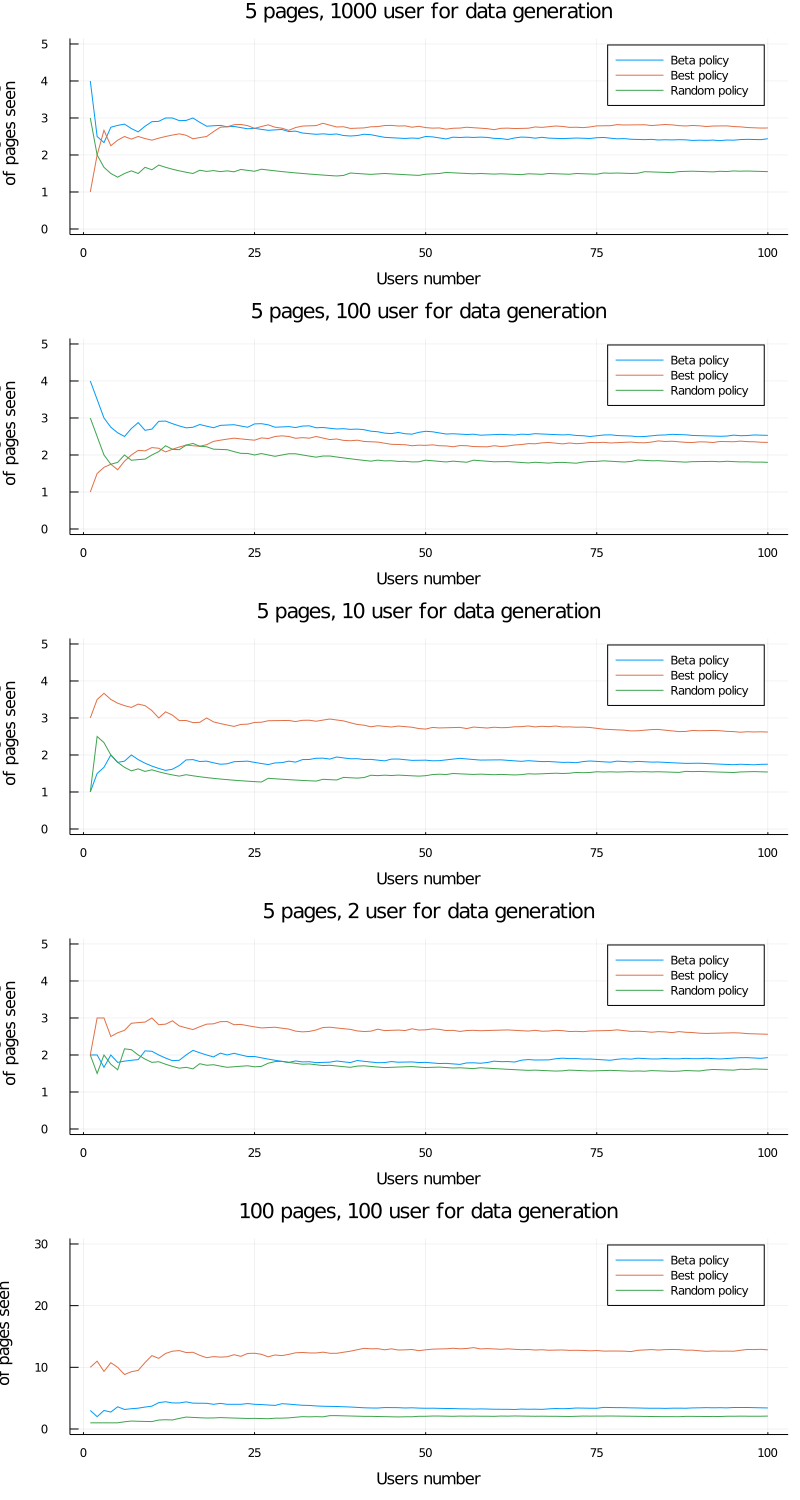

In [9]:
# Graphs 
include("Simple_MDP_includes/Simple_MDP_plot1.jl")

We see that when there is no many pages in the problem instance, even the data about two users sufficiently improves the presented policy with respect to the random. But on the other hand, we need a really big amount of data ( relatively to the number of pages ) to approach the best policy.<br>
But it is worth nothing, that we used the most primitive way to collect the data ( a random policy ). There are much more efficient statistical ways, that will provide us with much more useful data.<br>